In [37]:
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasdata.dataloader.loader import Loader
from sasmodels import weights

from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty
from bumps import parameter

import matplotlib.pyplot as plt

import glob

Copied from [sasview docs fitting example](https://github.com/SasView/documents/blob/master/Notebooks/sasmodels_fitting.ipynb)


### Load the data

In [2]:
root_fp = '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_15_Highlights_replicates/replicate_originals_subtracted'

In [3]:
filepaths = glob.glob('*.dat', root_dir=root_fp)

### Set up model

In [41]:
kernel = load_model('sphere')

In [120]:
def fit_sphere_model(fp, polydispersity = True):
    #load data
    loader = Loader()
    data = loader.load(root_fp + '/' +fp)[0]
    
    data.qmin = 0.003
    data.qmax = 0.05
    data.mask = np.isnan(data.y)
    
    #set up model
    pars = dict(scale = 1, background = 0.001, sld = 1, radius = 50)
    model = Model(kernel, **pars)
    model.radius.range(10, 5000)
    model.scale.range(0, 5)
    if polydispersity:
        model.radius_pd.range(0,1)
        model.radius_pd_type = 'lognormal'
        
    M = Experiment(data = data, model = model)
    problem = FitProblem(M)
    
    
    result = fit(problem, method='amoeba')
    
    plot_result(problem)
    
    return {l:v for l, v in zip(problem.labels(), result.x)}

{'radius': 1930.5979253297578, 'radius_pd': 0.2121322888095864, 'scale': 0.0014789381824543485}
{'radius': 1586.7454687044083, 'radius_pd': 0.14952426456832324, 'scale': 0.001256326531556105}
{'radius': 1211.6915543316668, 'radius_pd': 0.15554986984021235, 'scale': 0.0025382897093177005}
{'radius': 1835.570160930008, 'radius_pd': 0.13123500256009452, 'scale': 0.0028387944869467927}
{'radius': 1979.5074529738076, 'radius_pd': 0.16689330769854233, 'scale': 0.0037445338616343836}
{'radius': 3041.055768614103, 'radius_pd': 0.26760251564168114, 'scale': 0.012145496086120639}
{'radius': 1631.9849157312988, 'radius_pd': 0.1458349690492255, 'scale': 0.0010570688805399437}
{'radius': 10.000000000000004, 'radius_pd': 9.600039813108962e-17, 'scale': 0.3448377562237658}
{'radius': 1008.7896962203409, 'radius_pd': 0.19764014147538572, 'scale': 0.001640338209363324}
{'radius': 72.96270805839694, 'radius_pd': 0.4831419449644232, 'scale': 0.0013405253863139782}
{'radius': 582.9919704594395, 'radius_pd

/tmp/ipykernel_20449/1629969932.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


{'radius': 497.4672691157331, 'radius_pd': 0.296875691733956, 'scale': 0.0008589815084343142}
{'radius': 609.9548165499828, 'radius_pd': 0.21424352976239452, 'scale': 0.0016004868502249108}
{'radius': 721.2205683426153, 'radius_pd': 0.2414992032532648, 'scale': 0.0008508653582336373}
{'radius': 958.9094626879823, 'radius_pd': 0.1678771219860617, 'scale': 0.0021262105163018163}
{'radius': 1135.9568206309498, 'radius_pd': 0.21340122897067024, 'scale': 0.00045785060081501535}


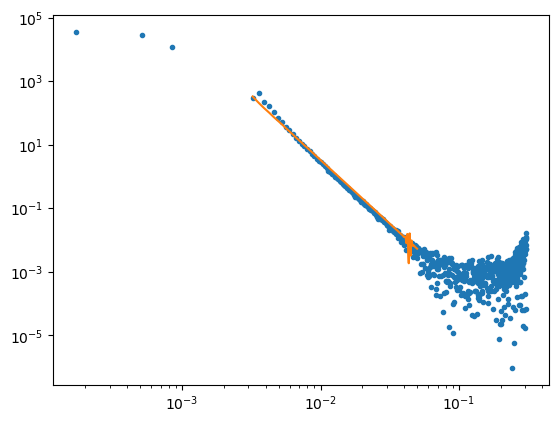

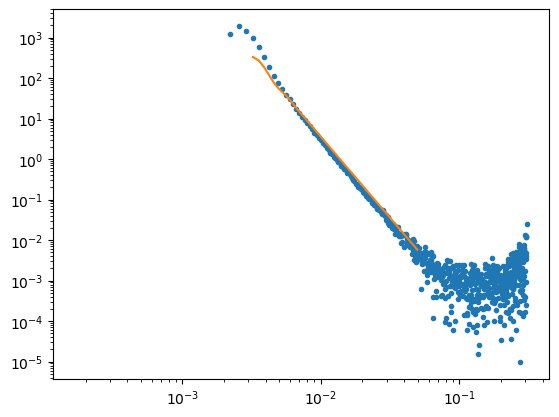

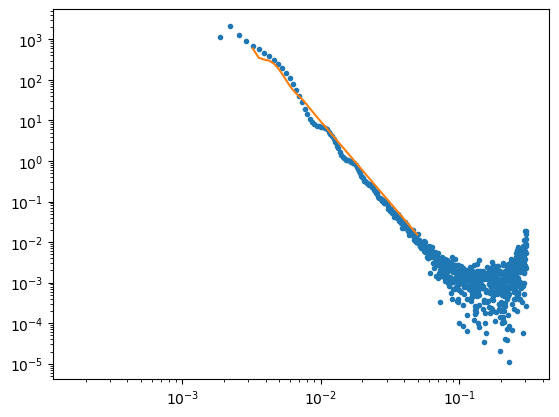

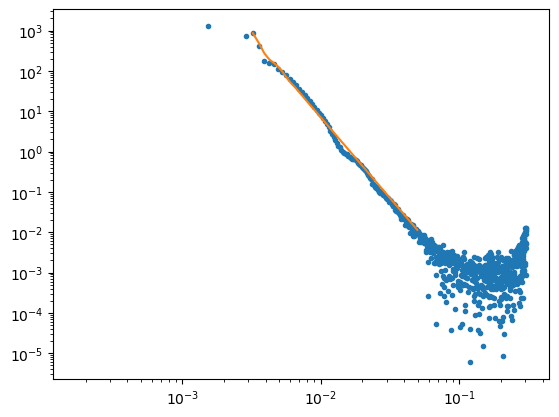

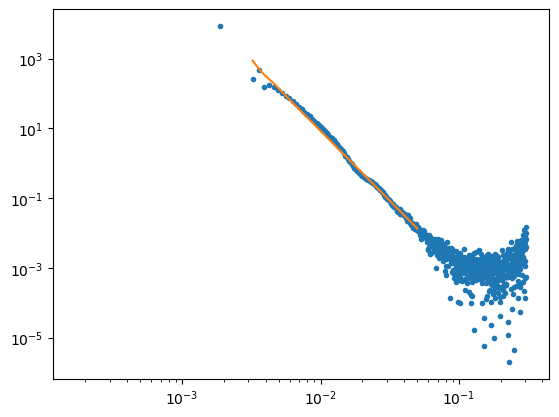

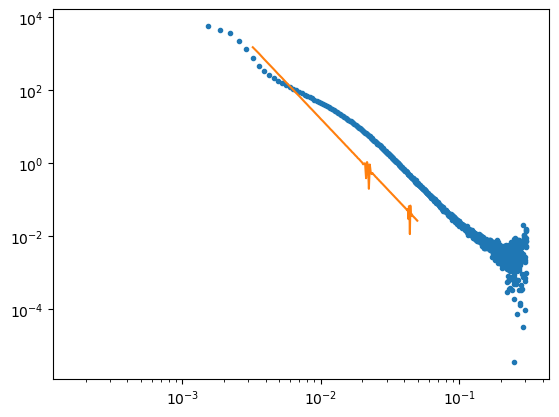

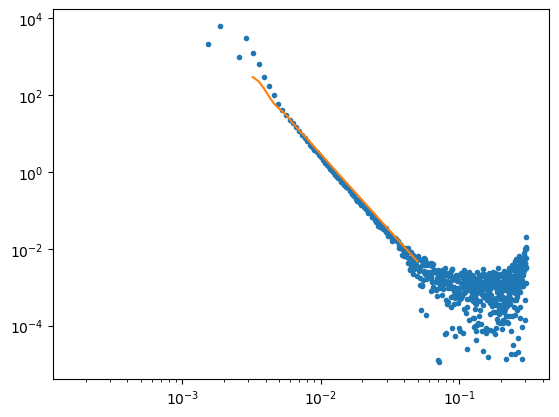

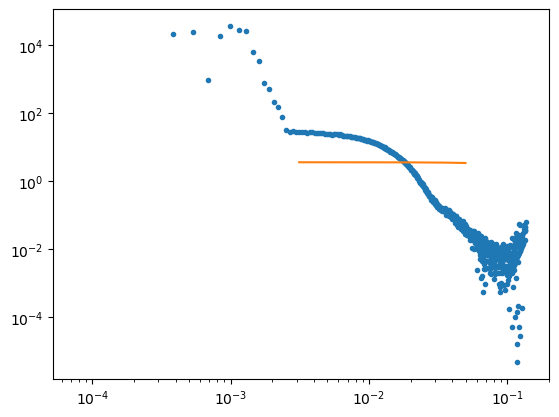

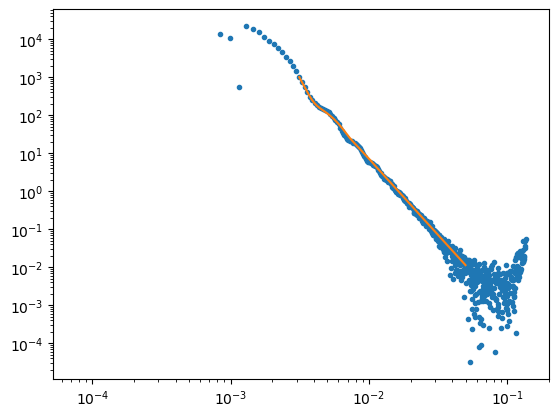

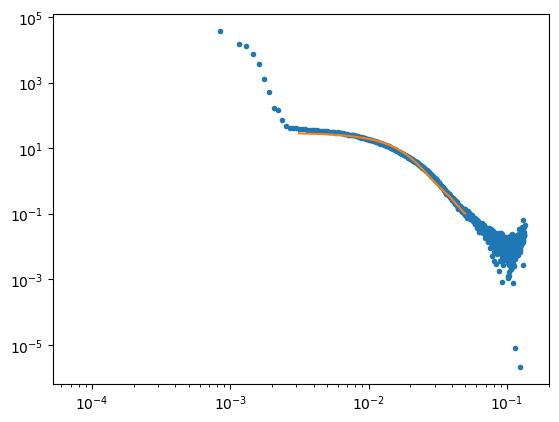

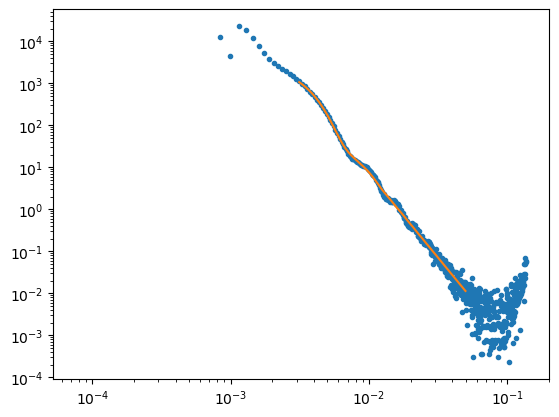

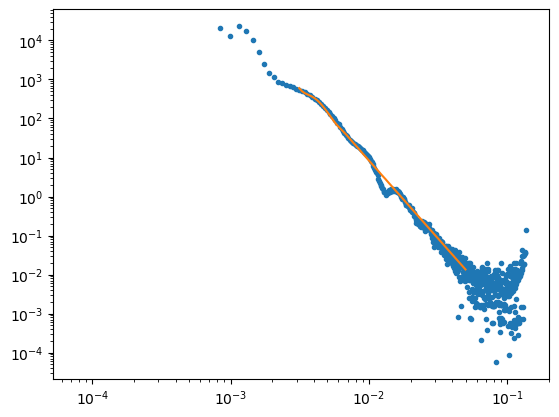

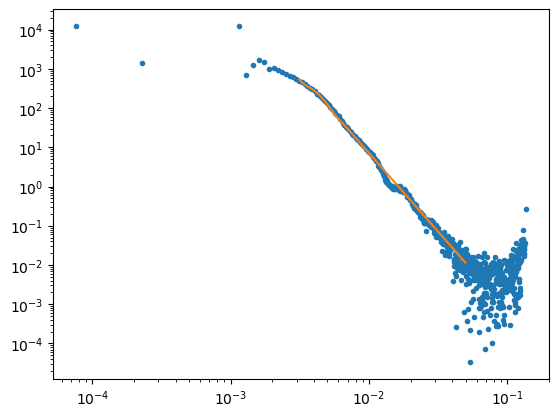

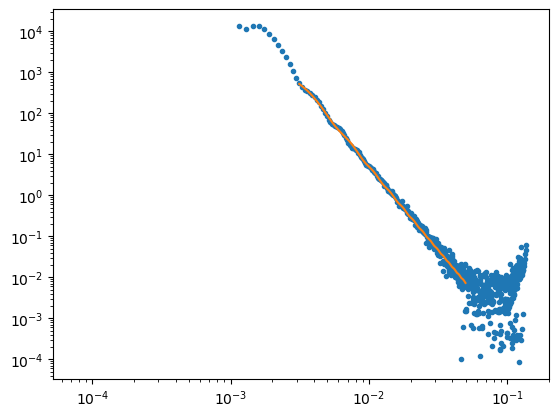

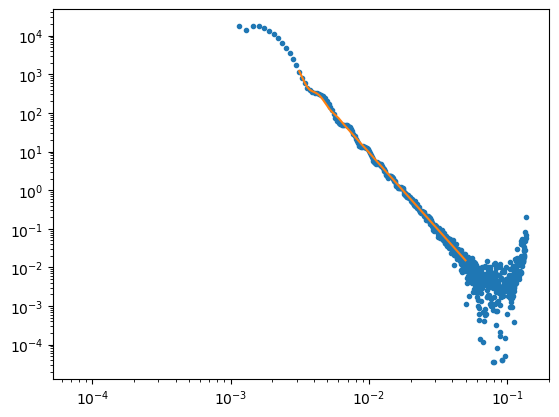

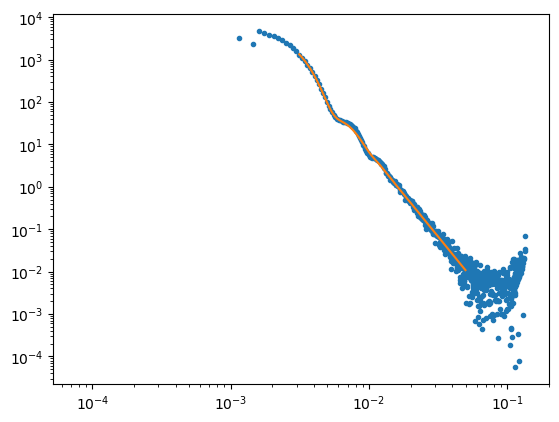

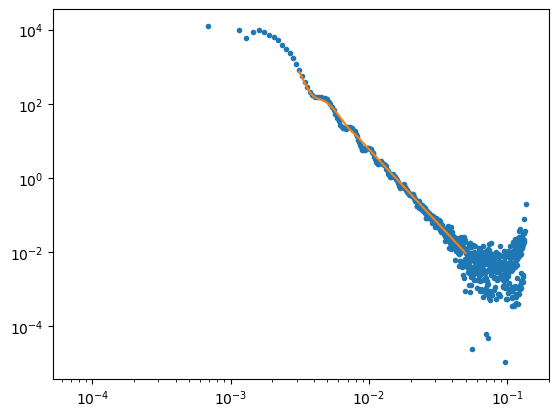

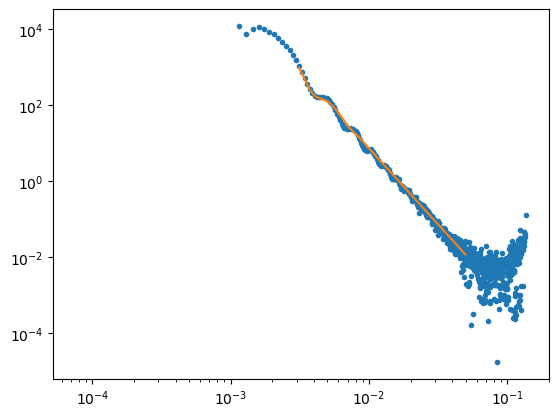

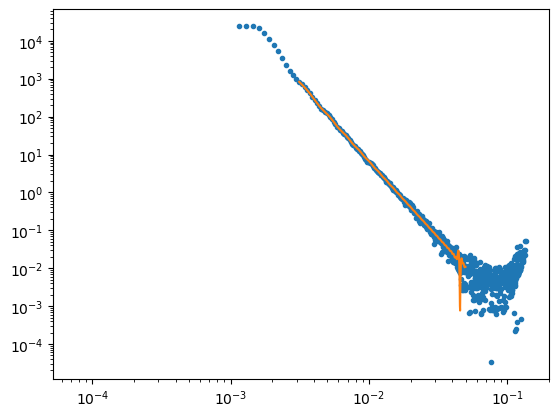

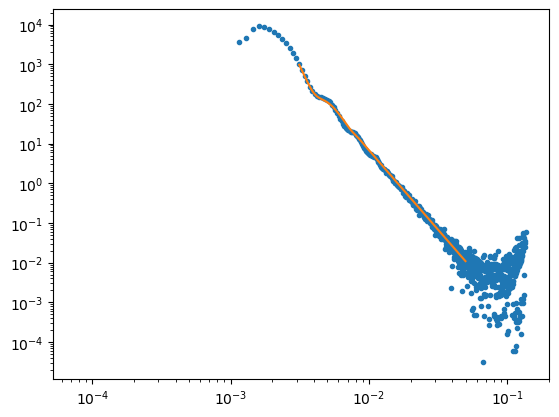

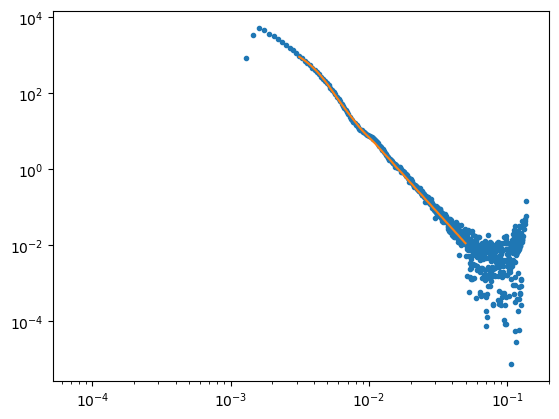

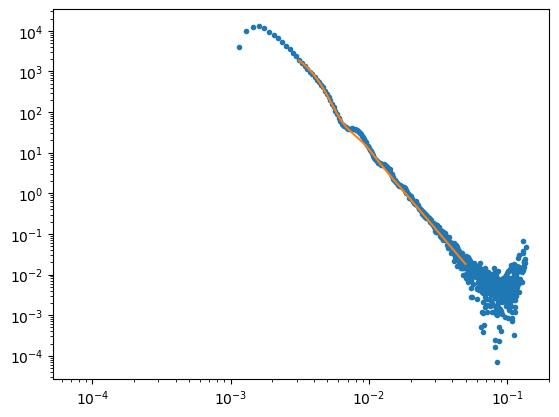

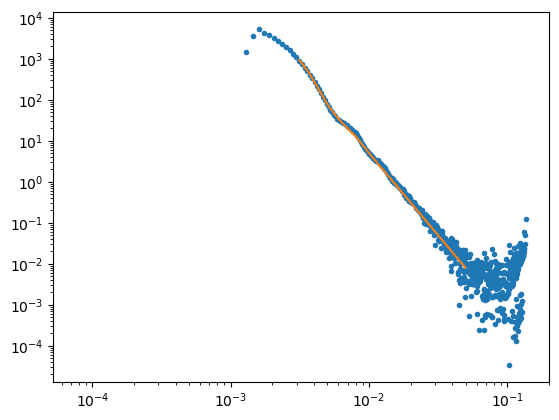

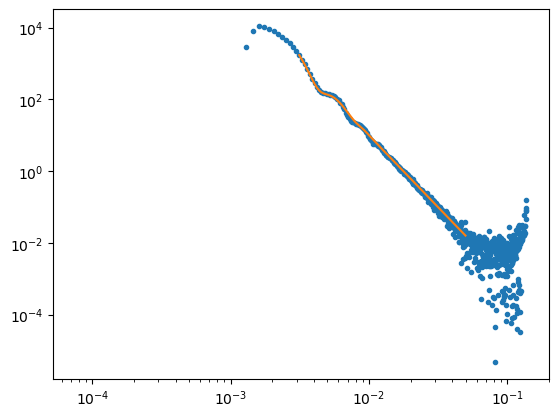

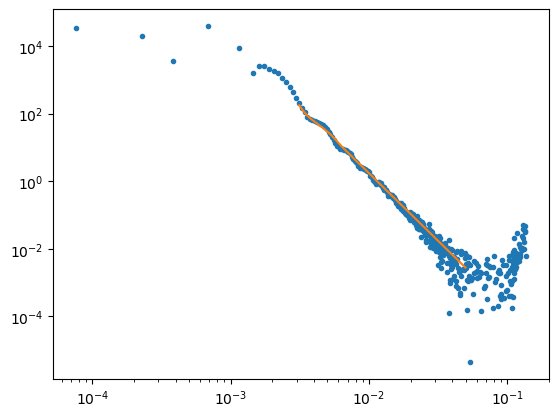

In [121]:
for fp in filepaths:
    r = fit_sphere_model(fp)
    print(r)

In [119]:
def plot_result(problem):
    
    for i, model in enumerate(problem.models):
        data = model._data
        Icalc = model.Iq_calc
        
        fig, ax = plt.subplots(1,1)
        
        fit_x = data.x[data.x < data.qmax]
        fit_x = fit_x[fit_x > data.qmin]
        
        ax.loglog(data.x, data.y, ls = '', marker = '.', label = 'observed')
        ax.loglog(fit_x, Icalc, ls = '-', label = 'fit')

In [ ]:
for i, model in enumerate(problem.models):
    print(model)
    data = model._data
    Icalc = model.Iq_calc

In [118]:
data.x > data.qmin

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [116]:
data.x = data.x[data.x > data.qmin]
data.x[

array([0.000509, 0.000849, 0.001189, 0.001528, 0.001868, 0.002207,
       0.002547, 0.002886, 0.003226, 0.003566, 0.003905, 0.004245,
       0.004584, 0.004924, 0.005264, 0.005603, 0.005943, 0.006282,
       0.006622, 0.006961, 0.007301, 0.007641, 0.00798 , 0.00832 ,
       0.008659, 0.008999, 0.009339, 0.009678, 0.010018, 0.010357,
       0.010697, 0.011036, 0.011376, 0.011716, 0.012055, 0.012395,
       0.012734, 0.013074, 0.013414, 0.013753, 0.014093, 0.014432,
       0.014772, 0.015111, 0.015451, 0.015791, 0.01613 , 0.01647 ,
       0.016809, 0.017149, 0.017489, 0.017828, 0.018168, 0.018507,
       0.018847, 0.019186, 0.019526, 0.019866, 0.020205, 0.020545,
       0.020884, 0.021224, 0.021564, 0.021903, 0.022243, 0.022582,
       0.022922, 0.023261, 0.023601, 0.023941, 0.02428 , 0.02462 ,
       0.024959, 0.025299, 0.025639, 0.025978, 0.026318, 0.026657,
       0.026997, 0.027336, 0.027676, 0.028016, 0.028355, 0.028695,
       0.029034, 0.029374, 0.029713, 0.030053, 0.030393, 0.030

In [68]:

#type(model.radius_pd.distribution)

In [57]:
model.radius_pd_type

'lognormal'

In [58]:
weights.GaussianDispersion()

In [35]:
parameter.Un

NameError: name 'bumps' is not defined

In [62]:
result.x

array([4.08341649e+02, 3.37590732e-01, 2.71917109e-04])

In [63]:
problem.labels()

['radius', 'radius_pd', 'scale']

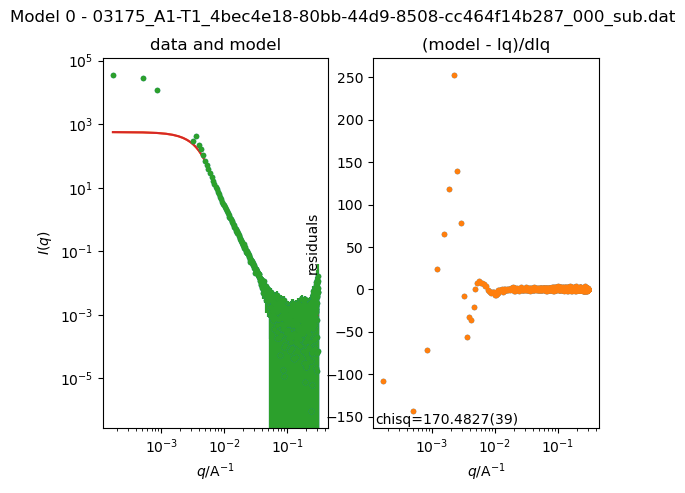

In [64]:
problem.plot()